# Part 2 import refactored- 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
%matplotlib inline


from preprocess_visuals import ModelComplexityRF, ModelComplexity, get_conv, get_usecols, selectKBest
from preprocess_visuals import add_interactions, scale, plot_box_hist2, col_stats, preprocess, dummies


pd.options.display.max_rows = 160
pd.options.display.max_columns = 200

In [55]:
df = pd.read_csv('data/LoanStats_securev1_2017Q1.csv', skiprows=1, skipfooter=2, 
                 engine='python', usecols=get_usecols(), converters=get_conv())

# dummy encode categorical valriables and impute missing values
df = preprocess(df)
display(df.head(10))

,loan_amnt,term,int_rate,installment,grade,emp_title,annual_inc,loan_status,zip_code,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,cr_history,fico_range_mean,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,15000.0,0.0,5.32,451.730011,7.0,0.0,182000.0,0.0,75.0,0.0,0.0,33.553261,68.749359,13.0,0.0,34623.0,33.700001,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,233521.0,0.0,1.0,0.0,1.0,24.0,2667.0,59.0,2.0,2.0,12503.0,42.0,102600.0,1.0,6.0,0.0,4.0,17963.0,55203.0,26.000000,0.0,0.0,92.0,508.0,8.0,8.0,5.0,8.0,17.0,0.0,3.0,6.0,7.0,11.0,9.0,10.0,16.0,6.0,13.0,0.0,0.0,2.0,100.000000,0.000000,0.0,0.0,325464.0,50766.0,74600.0,4508.0,42.0,742.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17000.0,0.0,7.49,528.729980,7.0,0.0,120000.0,0.0,84.0,0.0,0.0,72.000000,89.000000,9.0,1.0,15406.0,31.600000,34.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,290743.0,0.0,2.0,1.0,1.0,9.0,33276.0,86.0,0.0,2.0,5681.0,56.0,48800.0,1.0,0.0,1.0,3.0,32305.0,32394.0,32.200001,0.0,0.0,137.0,119.0,24.0,9.0,2.0,24.0,9.0,0.0,4.0,4.0,5.0,6.0,24.0,6.0,8.0,4.0,9.0,0.0,0.0,1.0,94.099998,20.000000,1.0,0.0,374071.0,48682.0,47800.0,38667.0,11.0,737.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20000.0,0.0,5.32,602.299988,7.0,0.0,120000.0,0.0,92.0,0.0,1.0,33.553261,68.749359,18.0,0.0,2646.0,3.000000,60.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,675385.0,1.0,10.0,1.0,2.0,3.0,672739.0,106.0,1.0,3.0,2075.0,51.0,87400.0,0.0,0.0,2.0,5.0,37521.0,84754.0,3.000000,0.0,0.0,175.0,175.0,9.0,3.0,0.0,9.0,3.0,0.0,3.0,3.0,8.0,12.0,46.0,8.0,14.0,3.0,18.0,0.0,0.0,2.0,100.000000,0.000000,0.0,0.0,688272.0,675385.0,87400.0,600872.0,14.0,772.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16000.0,1.0,12.74,361.929993,5.0,0.0,130000.0,0.0,57.0,0.0,0.0,42.000000,79.000000,16.0,1.0,8595.0,25.799999,48.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,44263.0,0.0,3.0,1.0,2.0,8.0,35668.0,77.0,2.0,6.0,4566.0,56.0,33300.0,3.0,9.0,6.0,8.0,2766.0,3350.0,58.099998,0.0,0.0,141.0,260.0,10.0,8.0,3.0,23.0,8.0,0.0,2.0,5.0,2.0,12.0,12.0,13.0,33.0,5.0,16.0,0.0,0.0,3.0,97.599998,50.000000,1.0,0.0,79751.0,44263.0,8000.0,46451.0,21.0,682.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
# display statistics about variables
col_stats(df).sort_values(by='Null Percent', ascending=False)

In [65]:
df = df[df.delinq_2yrs < 5]
df = df[df.open_acc < 30]
df = df[df.pub_rec < 10]
df = df[df.revol_bal > 2 ] 
df = df[df.revol_bal < 1000000 ] 
df = df[df.total_acc < 60]
df = df[df.tot_coll_amt < 200000 ] # outlier!
df = df[df.tot_cur_bal < 200000]
df = df[df.open_act_il < 10]
df = df[df.open_il_24m < 10]
df = df[df.mths_since_rcnt_il < 200]
df = df[df.total_bal_il < 200000]
df = df[df.il_util < 200]
df = df[df.open_rv_12m < 10]
df = df[df.open_rv_24m < 20]
df = df[df.max_bal_bc < 100000]
df = df[df.total_rev_hi_lim < 500000 ]
df = df[df.inq_fi < 15]
df = df[df.total_cu_tl < 10]
df = df[df.inq_last_12m < 10]
df = df[df.acc_open_past_24mths < 20]
df = df[df.avg_cur_bal < 100000]
df = df[df.bc_open_to_buy < 50000]
df = df[df.delinq_amnt < 10000]
df = df[df.mo_sin_old_il_acct < 300]
df = df[df.mo_sin_old_rev_tl_op < 600]
df = df[df.mo_sin_rcnt_rev_tl_op < 100]
df = df[df.mo_sin_rcnt_tl < 50]
df = df[df.mort_acc < 10]
df = df[df.mths_since_recent_bc < 200]
df = df[df.num_accts_ever_120_pd < 10]
df = df[df.num_actv_bc_tl < 15]
df = df[df.num_actv_rev_tl < 20]
df = df[df.num_bc_sats < 20]
df = df[df.num_bc_tl < 30]
df = df[df.num_il_tl < 40]
df = df[df.num_op_rev_tl < 30]
df = df[df.num_rev_accts < 60]
df = df[df.num_rev_tl_bal_gt_0 < 20]
df = df[df.num_sats < 30]
df = df[df.num_tl_op_past_12m < 10]
df = df[df.pct_tl_nvr_dlq > 50]
df = df[df.tot_hi_cred_lim < 200000]
df = df[df.total_bal_ex_mort < 500000]
df = df[df.total_bc_limit < 100000]
df = df[df.total_il_high_credit_limit < 400000]
print(len(df))

54030


(54030, 109)
Test score for param= 1 recall= 0.772 std= 0.051


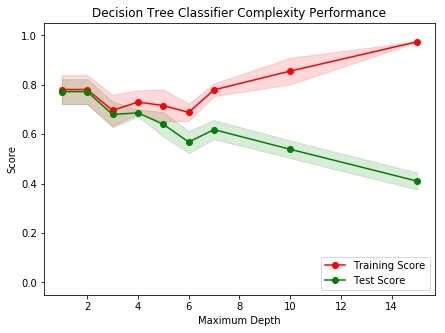

In [66]:
# split data and train
y = df.loan_status
X = df.drop(columns='loan_status')
print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
ModelComplexity(X_train, y_train, p_range=[1, 2, 3, 4, 5, 6, 7, 10, 15])

Test score for param= 50 recall= 0.793 std= 0.025


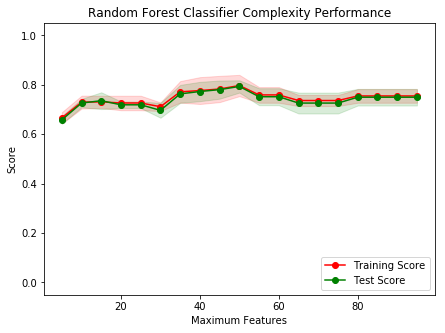

CPU times: user 20.2 s, sys: 422 ms, total: 20.6 s
Wall time: 20.8 s


In [69]:
%%time
ModelComplexityRF(X_train, y_train, p_range=range(5, 100, 5))

Test score for param= 40 recall= 0.76 std= 0.039


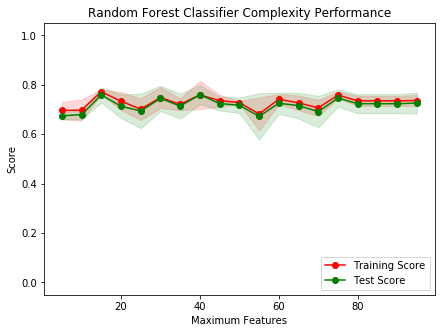

CPU times: user 36.2 s, sys: 462 ms, total: 36.7 s
Wall time: 45.1 s


In [51]:
%%time
ModelComplexityRF(X_train, y_train, p_range=range(5, 100, 5), max_depth=2)

Test score for param= 15 recall= 0.7 std= 0.02


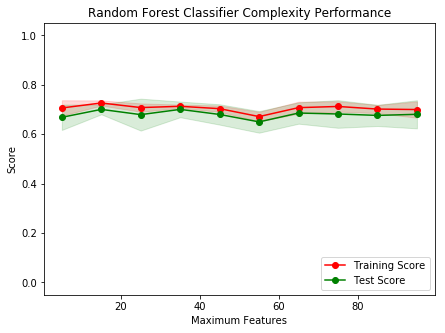

CPU times: user 28.6 s, sys: 332 ms, total: 29 s
Wall time: 30 s


In [52]:
%%time
ModelComplexityRF(X_train, y_train, p_range=range(5, 100, 10), max_depth=3)

(54030, 50)
(54030, 1271)
(54030, 50)
Test score for param= 35 recall= 0.776 std= 0.068


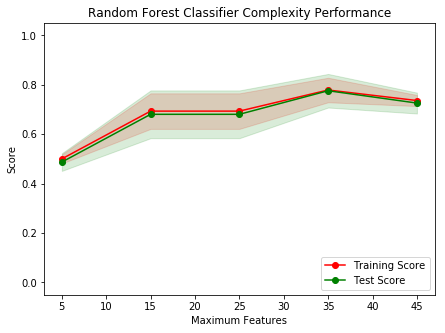

In [54]:
# split data and train
y = df.loan_status
X = df.drop(columns='loan_status')
x_scaled = scale(X)
x_scaled = selectKBest(x_scaled, y, 50)
print(x_scaled.shape)

# add 2nd degree polynomial interactions
x_scaled = add_interactions(x_scaled)
print(x_scaled.shape)

# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features
x_scaled = selectKBest(x_scaled, y, 50)
print(x_scaled.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=0)
ModelComplexityRF(X_train, y_train, p_range=range(5, len(x_scaled.columns), 10))

### Train the model

In [40]:
%%time
ModelComplexityRF(X_train, y_train)

ValueError: max_features must be in (0, n_features]

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=1)
#ftwo_scorer = make_scorer(fbeta_score, beta=2)
clf.fit(X_train, y_train)


print(clf.feature_importances_)
y_predicted = clf.predict(X_test_selected)

print("recall:", round(recall_score(y_test, y_predicted), 4))

In [ ]:
%%time
y = df.loan_status
X = df.drop(columns='loan_status')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', SVC())
])

N_FEATURES_OPTIONS = [1, 2, 3, 4]
C_OPTIONS = [1, 10, 100]
GAMMA_OPTIONS = [1, 10, 100]
KERNEL_OPTIONS= ['linear', 'poly', 'rbf', 'sigmoid']


param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2), SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'KBest(chi2)', 'KBest']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid, scoring='recall')
grid.fit(X_train, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

In [ ]:
# re-plot the normalized data
# for col in dfr.columns.values:
#     plot_box_hist2(X_train_selected, col, col, bins=50)

In [ ]:
pd.options.display.max_colwidth=1000
pd.DataFrame(grid.cv_results_)#.loc[grid.best_index_,:]

In [ ]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
## select score for best C
#mean_scores = mean_scores.max(axis=0)

mean_scores

In [ ]:
%%time
y = df.loan_status
X = df.drop(columns='loan_status')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=7, 
                                        max_depth=3))
])

N_FEATURES_OPTIONS = [3, 10, 20, 30]

MAX_DEPTH_OPTIONS= [2, 3, 4]
N_ESTIMATORS_OPTIONS = [50, 75]

param_grid = [
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__max_depth': MAX_DEPTH_OPTIONS,
        'classify__n_estimators': N_ESTIMATORS_OPTIONS
        
    },
]

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid, scoring='recall')
grid.fit(X_train, y_train)

In [ ]:
depth_labels = ['n_feat=2', 'n_feat=3', 'n_feat=4'] #['1', '2', '3', '4']

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(MAX_DEPTH_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best K
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_ESTIMATORS_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure();
COLORS = 'bgrcmyk'
for i, (label, depth_scores) in enumerate(zip(depth_labels, mean_scores)):
    plt.bar(bar_offsets + i, depth_scores, label=label, color=COLORS[i])

plt.title("Comparing effect of Number of estimators (best depth)")
plt.xlabel('Number of estimators')
plt.xticks(bar_offsets + len(depth_labels) / 2, N_ESTIMATORS_OPTIONS)
plt.ylabel('Charge-off classification recall')
plt.ylim((0, 1))
plt.legend(loc='upper left');

In [ ]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = mean_scores.reshape(len(MAX_DEPTH_OPTIONS), -1, len(N_FEATURES_OPTIONS))

mean_scores

In [ ]:
mean_scores.max(0)

In [ ]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','param_reduce_dim__k', 'param_classify__max_depth','param_classify__n_estimators']]

In [ ]:
mean_scores.max(axis=0)

- Best result: DT, GINI, cv=3, class_weight='balanced'
- Test score for max_depth: 4 recall: 0.693 std: 0.011
- Test score for max_depth: 3 recall: 0.707 std: 0.023, Poly Feat, 100 best

- Test score R.F. criterion= entropy for max_depth= 5 f2= 0.236 std= 0.002
- Test score D.T. criterion= entropy for max_depth= 1 f2= 0.226 std= 0.011



            